<a href="https://colab.research.google.com/github/Witcape/PSO/blob/main/Final_LLM_Weight_Glorot_LLM_Initialisation_Quasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [6]:
# !pip install accelerate
# import accelerate

In [7]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.1 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-70.2.0-py3-none-any.whl (930 kB)
    Using cached scikit_build-0.18.0-py3-none-any.whl (85 kB)
    Using cached cmake-3.30.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.9 MB)
    Using cached ninja-1.11.1.1-py2.py3-none-manylinux1_x86_64.manylinux_2_5_x86_64.whl (307 kB)
    Using cached distro-1.9.0-py3-none-any.whl (20 kB)
    Using cached packaging-24.1-py3-none-any.whl (53 kB)
    Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Creating /tmp/pip-build-env-xevixhah/overlay/local/bin
    changing mode of /tmp/pip-build-env-xevixhah/overlay/local/bin/ninja to 755
    changing mode of 

In [8]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [9]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt

In [10]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [11]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [12]:
lcpp_llm.params.n_gpu_layers

32

### Initialisation using LLM

In [15]:
method =' Quasi-Random Sequence'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [16]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [17]:
print(response)

{'id': 'cmpl-5e34f821-4dca-4b5e-a693-3694c71a53d9', 'object': 'text_completion', 'created': 1720416165, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using  Quasi-Random Sequence, only 2 decimal places, \n\nASSISTANT:\n\nSure! Here are 20 quasi-random numbers between -10 and 10 with two decimal places:\n\n1. -8.47\n2. -5.63\n3. -2.92\n4. -1.74\n5. -0.98\n6. -0.49\n7. -0.27\n8. 0.15\n9. 0.42\n10. 0.76\n11. 1.13\n12. 1.52\n13. 2.01\n14. 2.53\n15. 3.11\n16. 3.72\n17. 4.48\n18. 5.39\n19. 6.46\n20. 7.70\n\nI hope these numbers meet your needs! Let me know if you have any other questions or requests.', 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 64, 'completion_tokens': 220, 't

In [18]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.47, -5.63, -2.92, -1.74, -0.98, -0.49, -0.27, 0.15, 0.42, 0.76, 1.13, 1.52, 2.01, 2.53, 3.11, 3.72, 4.48, 5.39, 6.46, 7.7]


## Normalised Glorot Initialization

###PSO Parameters

In [19]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.9 MB/s eta 0:00:00


In [20]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [21]:
def sphere(x):
    return sum(x**2)

In [22]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [23]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
print(nPop)

20


In [24]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [25]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [26]:
particles = []

for i in range(nPop):
    position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [27]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Weight W using LLM

In [28]:
w_values = []
g_values = []

for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:  # tell best cost using roullete wheel. LLM will check for global best
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']} # tell best cost using roullete wheel

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    prompt = f"generate one positive number that is smaller than {w} using Normalised Glorot Initialisation. Don't write anything else, just write that number in decimal notation normally."
    w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                          repeat_penalty=1.2, top_k=150,
                          echo=True)

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    text_response = w_response['choices'][0]['text']
    value = re.findall(r'-?\d+\.\d+', text_response)
    value = [float(num) for num in value]

    value = value[np.size(value) - 1]
    print(f'w{it+1} = {value}')
    w_values.append(w)
    w = value

w_values.append(w)
print(w_values)

Iteration 1: Best Cost = 0.22499999999999995


Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 0.09810795139627493


Llama.generate: prefix-match hit


w2 = 0.13
Iteration 3: Best Cost = 0.08376057910795266


Llama.generate: prefix-match hit


w3 = 0.08
Iteration 4: Best Cost = 0.08288748150594472


Llama.generate: prefix-match hit


w4 = 0.065
Iteration 5: Best Cost = 0.0794958325554964


Llama.generate: prefix-match hit


w5 = 0.047
Iteration 6: Best Cost = 0.0794958325554964


Llama.generate: prefix-match hit


w6 = 0.013
Iteration 7: Best Cost = 0.05647756936714182


Llama.generate: prefix-match hit


w7 = 0.007
Iteration 8: Best Cost = 0.01717378736112647


Llama.generate: prefix-match hit


w8 = 0.0069245381
Iteration 9: Best Cost = 0.015063859889947054


Llama.generate: prefix-match hit


w9 = 0.0067340625
Iteration 10: Best Cost = 0.012880192716405028


Llama.generate: prefix-match hit


w10 = 0.0067198572
Iteration 11: Best Cost = 0.005028653160480521


Llama.generate: prefix-match hit


w11 = 0.0063412949
Iteration 12: Best Cost = 0.0028137935090528383


Llama.generate: prefix-match hit


w12 = 0.0057836329
Iteration 13: Best Cost = 0.0027980794544486117


Llama.generate: prefix-match hit


w13 = 0.0045123456
Iteration 14: Best Cost = 0.0012864720116673768


Llama.generate: prefix-match hit


w14 = 0.0044879345
Iteration 15: Best Cost = 0.0009383082503053399


Llama.generate: prefix-match hit


w15 = 0.0021697579
Iteration 16: Best Cost = 0.0008908868609649391


Llama.generate: prefix-match hit


w16 = 0.002143814
Iteration 17: Best Cost = 0.0005674393111880318


Llama.generate: prefix-match hit


w17 = 0.002129576
Iteration 18: Best Cost = 0.0005313409945839894


Llama.generate: prefix-match hit


w18 = 0.00212843
Iteration 19: Best Cost = 0.00044007769767332686


Llama.generate: prefix-match hit


w19 = 0.00212796
Iteration 20: Best Cost = 0.00040289315784671983


Llama.generate: prefix-match hit


w20 = 0.00212795
[1, 0.25, 0.13, 0.08, 0.065, 0.047, 0.013, 0.007, 0.0069245381, 0.0067340625, 0.0067198572, 0.0063412949, 0.0057836329, 0.0045123456, 0.0044879345, 0.0021697579, 0.002143814, 0.002129576, 0.00212843, 0.00212796, 0.00212795]


In [29]:
print(w_values)

[1, 0.25, 0.13, 0.08, 0.065, 0.047, 0.013, 0.007, 0.0069245381, 0.0067340625, 0.0067198572, 0.0063412949, 0.0057836329, 0.0045123456, 0.0044879345, 0.0021697579, 0.002143814, 0.002129576, 0.00212843, 0.00212796, 0.00212795]


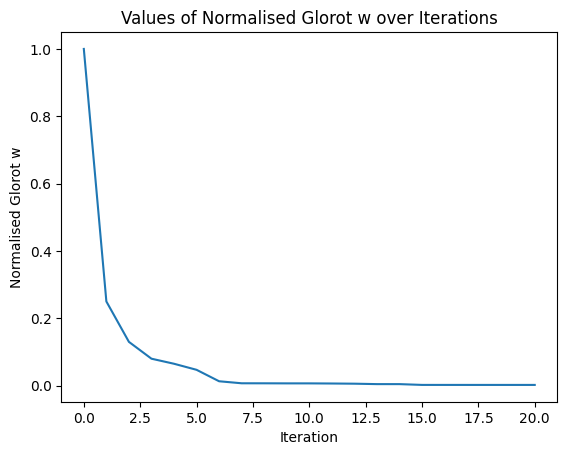

In [30]:
Normalised_Glorot_weights = w_values
plt.plot(Normalised_Glorot_weights)
plt.xlabel("Iteration")
plt.ylabel("Normalised Glorot w")
plt.title("Values of Normalised Glorot w over Iterations")
plt.show()

[0.22499999999999995, 0.09810795139627493, 0.08376057910795266, 0.08288748150594472, 0.0794958325554964, 0.0794958325554964, 0.05647756936714182, 0.01717378736112647, 0.015063859889947054, 0.012880192716405028, 0.005028653160480521, 0.0028137935090528383, 0.0027980794544486117, 0.0012864720116673768, 0.0009383082503053399, 0.0008908868609649391, 0.0005674393111880318, 0.0005313409945839894, 0.00044007769767332686, 0.00040289315784671983]


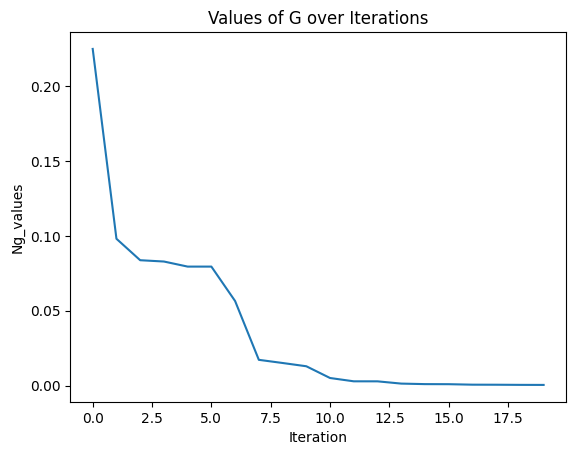

In [33]:
print(g_values)

plt.plot(g_values)
plt.xlabel("Iteration")
plt.ylabel("Ng_values")
plt.title("Values of G over Iterations")
plt.show()